In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
from sklearn.ensemble import RandomForestRegressor

In [2]:
store= pd.read_csv('/content/stores_data_set.csv')
sales= pd.read_csv('/content/sales_data_set.csv')
features= pd.read_csv('/content/Features_data_set.csv')

In [3]:
store.shape, sales.shape, features.shape

((45, 3), (421570, 5), (8190, 12))

In [4]:
store

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [6]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
features.isna().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [8]:
working=features[features['IsHoliday']==False]
holiday=features[features['IsHoliday']==True]

In [9]:
holiday.shape, working.shape

((585, 12), (7605, 12))

In [10]:
holiday.isna().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,271
MarkDown2,318
MarkDown3,286
MarkDown4,301
MarkDown5,270
CPI,0


In [11]:
working.isna().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,3887
MarkDown2,4951
MarkDown3,4291
MarkDown4,4425
MarkDown5,3870
CPI,585


In [12]:
feature_store=pd.merge(store, features, on='Store', how='inner')
feature_store.shape

(8190, 14)

In [13]:
sales.drop('IsHoliday', axis=1, inplace=True)

In [14]:
df=pd.merge(sales, feature_store, on=['Store', 'Date'], how='inner')
df.shape

(421570, 16)

In [15]:
df

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,05/02/2010,50605.27,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,05/02/2010,13740.12,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,05/02/2010,39954.04,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,05/02/2010,32229.38,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,26/10/2012,5203.31,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,26/10/2012,56017.47,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,26/10/2012,6817.48,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [16]:
df.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [18]:
# weekly sales can't be negative value either change it to postive or null
df['Weekly_Sales']=df['Weekly_Sales'].apply(lambda x: -1*x if x<0 else x)

In [19]:
# creating new features to check if day, month and year have relation with markdowns and weekly sales
df.Date = pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [20]:
df.drop('Date', axis=1, inplace=True)

In [22]:
df['Type']=df['Type'].map({'A':1, 'B':2, 'C':3})
df['IsHoliday']=df['IsHoliday'].map({False:0, True:1})

In [23]:
df

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,24924.50,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,2,50605.27,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,3,13740.12,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,4,39954.04,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,5,32229.38,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,2,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,26,10,2012
421566,45,94,5203.31,2,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,26,10,2012
421567,45,95,56017.47,2,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,26,10,2012
421568,45,97,6817.48,2,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,26,10,2012


In [24]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month',
       'Year'],
      dtype='object')

In [25]:
con=['Weekly_Sales','Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment',]

In [26]:
def chart(df, column):
  sns.set_style("whitegrid")
  plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  sns.histplot(data= df,x=column,kde=True,bins=30,color='blue')

  plt.subplot(1,2,2)
  sns.boxplot(df[column])
  plt.show

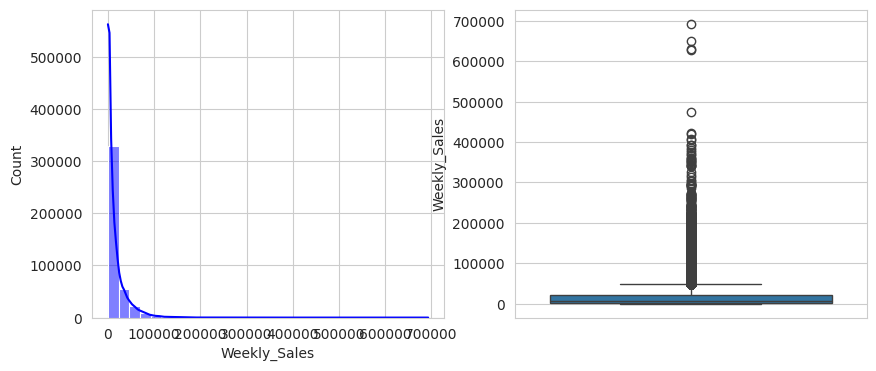

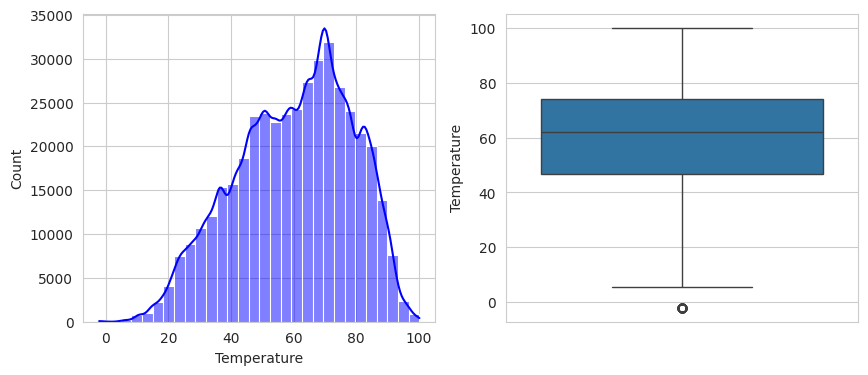

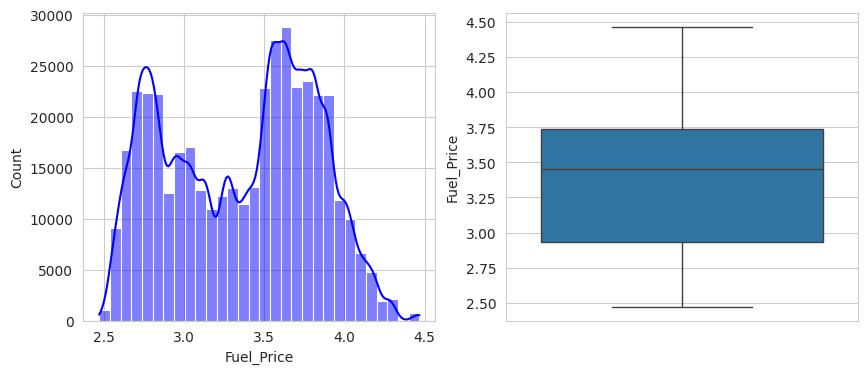

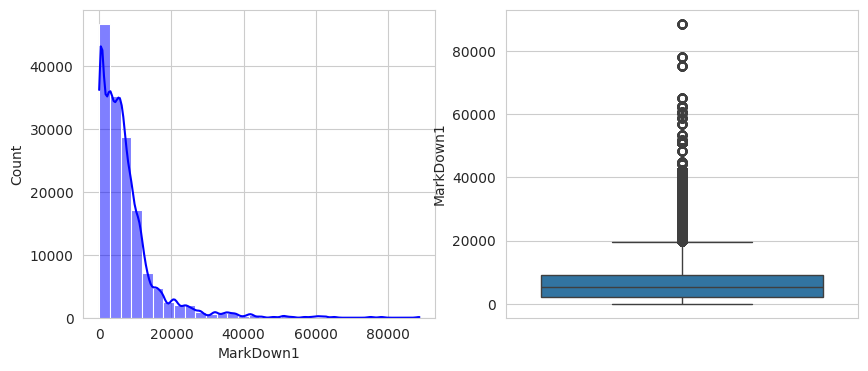

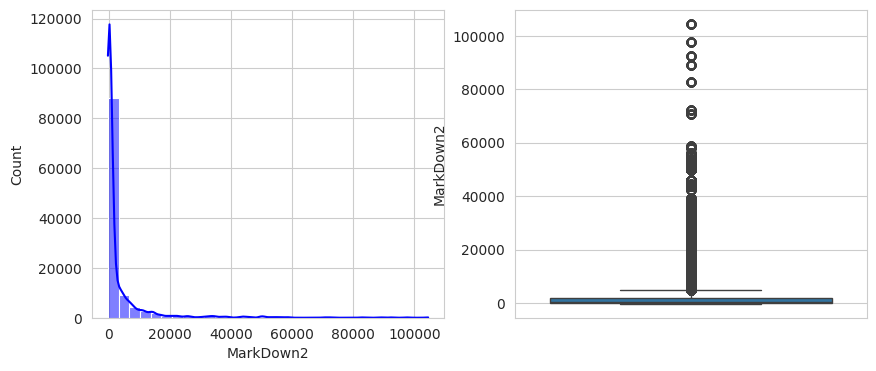

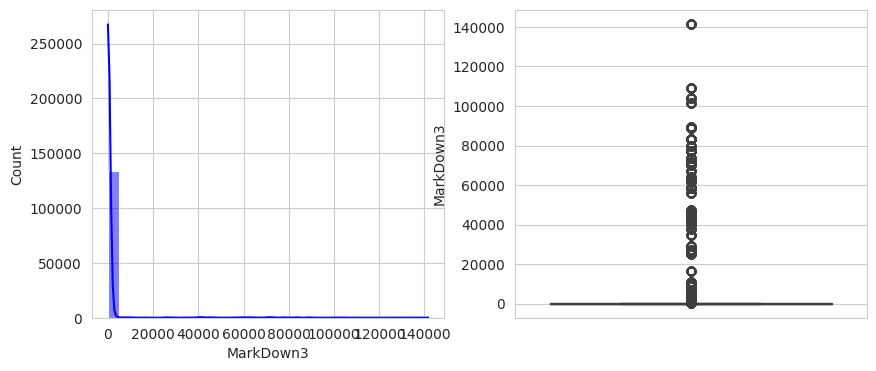

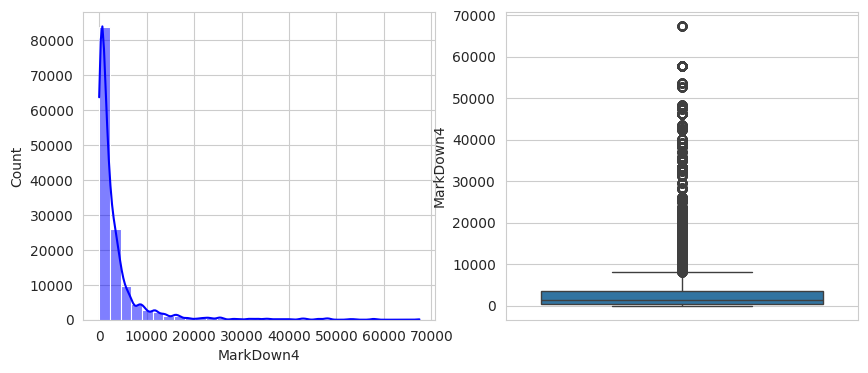

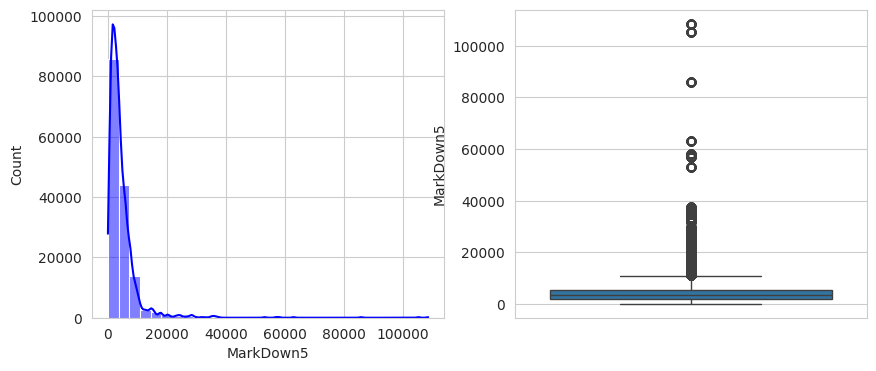

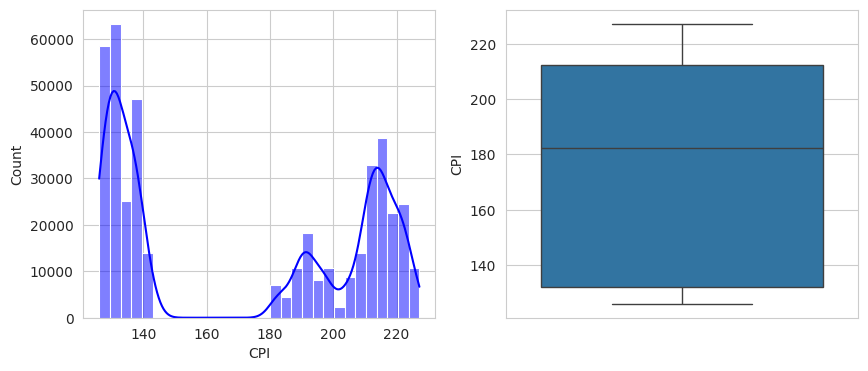

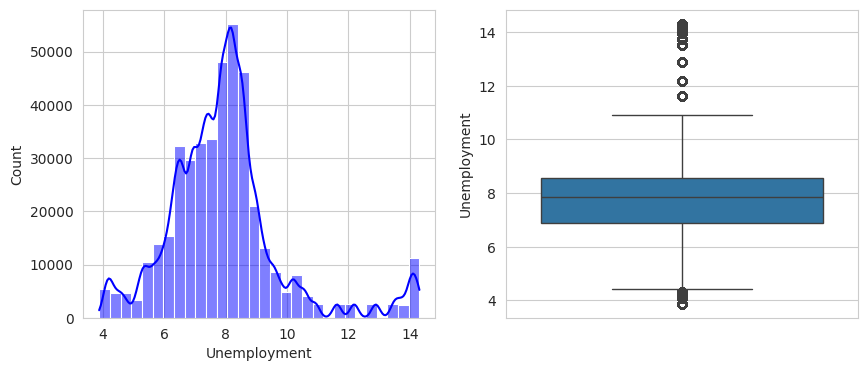

In [27]:
for i in con:
  chart(df, i)

In [28]:
for i in con:
  print(f'{i} = {skew(df[i])}')

Weekly_Sales = 3.2620955965399565
Temperature = -0.32140300837175534
Fuel_Price = -0.1049011223750906
MarkDown1 = nan
MarkDown2 = nan
MarkDown3 = nan
MarkDown4 = nan
MarkDown5 = nan
CPI = 0.08521898151118588
Unemployment = 1.1837383565857527


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

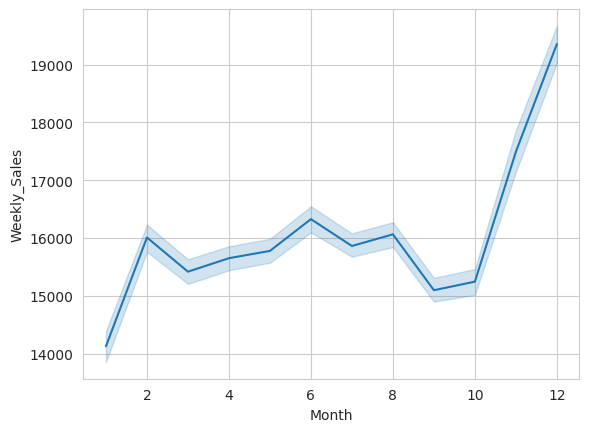

In [29]:
#  Nov and Dec have more weekly sales
sns.lineplot(x="Month" ,y = "Weekly_Sales" , data=df)

In [30]:
holiday = df.groupby('IsHoliday')['Weekly_Sales'].sum()

In [31]:
holiday.values

array([6.23207979e+09, 5.05315519e+08])

In [32]:
holiday

,Weekly_Sales
IsHoliday,
0,6.232080e+09
1,5.053155e+08


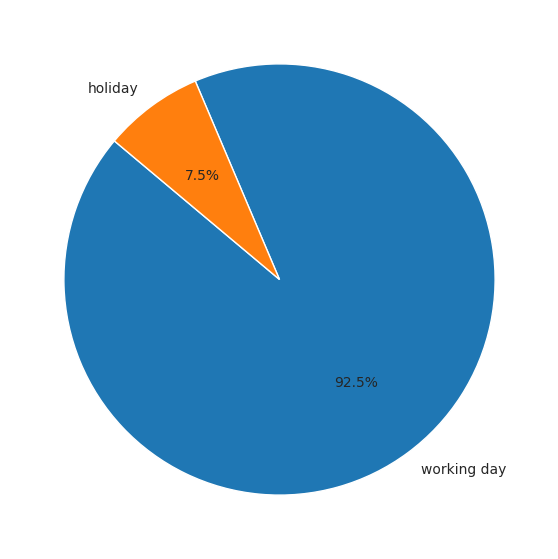

In [33]:
plt.figure(figsize=(7, 7))
plt.pie(holiday.values, labels=['working day', 'holiday'], autopct='%1.1f%%', startangle=140)
plt.show()

In [ ]:
# checking if there's any percentage distribution between markdowns

In [34]:
df_nonull = df.dropna(how='any')

In [35]:
df_nonull.shape

(97056, 18)

In [36]:
df_nonull

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
6587,1,1,18689.54,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,11,11,2011
6588,1,2,44936.47,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,11,11,2011
6589,1,3,9959.64,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,11,11,2011
6590,1,4,36826.52,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,11,11,2011
6591,1,5,31002.65,1,151315,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,0,11,11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,2,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,26,10,2012
421566,45,94,5203.31,2,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,26,10,2012
421567,45,95,56017.47,2,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,26,10,2012
421568,45,97,6817.48,2,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,26,10,2012


In [37]:
df_nonull['markdown_total']=df_nonull['MarkDown1'] + df_nonull['MarkDown2'] + df_nonull['MarkDown3'] + df_nonull['MarkDown4']+df_nonull['MarkDown5']

<ipython-input-37-5e5c7fbd45ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull['markdown_total']=df_nonull['MarkDown1'] + df_nonull['MarkDown2'] + df_nonull['MarkDown3'] + df_nonull['MarkDown4']+df_nonull['MarkDown5']


In [39]:
# percentage distribution of markdowns
df_nonull['mk1'] = ((df_nonull['MarkDown1'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))
df_nonull['mk2'] = ((df_nonull['MarkDown2'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))
df_nonull['mk3'] = ((df_nonull['MarkDown3'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))
df_nonull['mk4'] = ((df_nonull['MarkDown4'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))
df_nonull['mk5'] = ((df_nonull['MarkDown5'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))

<ipython-input-39-d7f03a1a2fe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull['mk1'] = ((df_nonull['MarkDown1'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))
<ipython-input-39-d7f03a1a2fe0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull['mk2'] = ((df_nonull['MarkDown2'] / df_nonull['markdown_total'])*100).apply(lambda i: round(i))
<ipython-input-39-d7f03a1a2fe0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [41]:
df_nonull

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday,Day,Month,Year,markdown_total,mk1,mk2,mk3,mk4,mk5
6587,1,1,18689.54,1,151315,59.11,3.297,10382.90,6115.67,215.07,...,0,11,11,2011,25671.68,40,24,1,9,26
6588,1,2,44936.47,1,151315,59.11,3.297,10382.90,6115.67,215.07,...,0,11,11,2011,25671.68,40,24,1,9,26
6589,1,3,9959.64,1,151315,59.11,3.297,10382.90,6115.67,215.07,...,0,11,11,2011,25671.68,40,24,1,9,26
6590,1,4,36826.52,1,151315,59.11,3.297,10382.90,6115.67,215.07,...,0,11,11,2011,25671.68,40,24,1,9,26
6591,1,5,31002.65,1,151315,59.11,3.297,10382.90,6115.67,215.07,...,0,11,11,2011,25671.68,40,24,1,9,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,2,118221,58.85,3.882,4018.91,58.08,100.00,...,0,26,10,2012,5247.26,77,1,2,4,16
421566,45,94,5203.31,2,118221,58.85,3.882,4018.91,58.08,100.00,...,0,26,10,2012,5247.26,77,1,2,4,16
421567,45,95,56017.47,2,118221,58.85,3.882,4018.91,58.08,100.00,...,0,26,10,2012,5247.26,77,1,2,4,16
421568,45,97,6817.48,2,118221,58.85,3.882,4018.91,58.08,100.00,...,0,26,10,2012,5247.26,77,1,2,4,16


In [55]:
df_nonull[df_nonull['Day']==1].mk1.unique()

array([59, 60, 49, 57, 58, 77, 39, 46, 53, 78, 61, 79, 54, 64, 70, 52, 66,
       56, 71, 42, 69])

In [56]:
df_nonull[df_nonull['Month']==11].mk1.unique()

array([40, 47,  1, 26, 70, 27, 29, 39, 44, 16,  0, 54, 34, 42, 36, 32, 55,
       37, 41, 53, 43,  8, 56, 38, 28, 46, 49, 33, 24, 58, 66, 35, 22, 50,
        4, 59, 17, 61,  3, 57, 89, 30, 64])

In [54]:
df_nonull[df_nonull['Year']==2012].mk1.unique()

array([16, 30, 38, 33, 45, 36, 31, 62, 47, 60, 71, 50, 25, 59, 54, 52, 32,
       49, 37, 35, 57, 43, 64, 46, 11, 20, 41, 56, 53, 55, 75, 22, 44, 23,
       51, 58, 27, 73, 66, 70, 80, 65, 14, 15, 19, 17, 39, 63, 34, 69, 28,
       40, 29, 26, 42, 48,  7, 61, 68, 13, 21, 74, 90,  3,  9, 77, 72, 10,
       24, 12, 67, 76, 82,  5, 78, 79, 18,  6,  8, 83, 87, 81,  4])

In [ ]:
# markdowns is not distributed with respect to day, month or year

In [45]:
pd.set_option('display.max_columns', None)

In [46]:
df_nonull.corr()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year,markdown_total,mk1,mk2,mk3,mk4,mk5
Store,1.000000,0.008392,-0.053837,-0.029007,0.088596,-0.153155,0.136718,0.006861,-0.019274,-0.018068,0.002050,0.060453,-0.213719,0.221854,-0.005363,0.020455,-0.017971,0.007465,0.003724,-0.027579,0.017323,-0.001465,-0.057664,0.048031
Dept,0.008392,1.000000,0.137129,-0.017162,0.018307,-0.001662,-0.000743,0.004395,0.001124,0.003469,0.004650,0.004794,-0.006935,0.002805,0.002026,-0.000939,0.002568,-0.001466,0.007128,-0.003878,-0.000945,0.003577,0.002341,0.000552
Weekly_Sales,-0.053837,0.137129,1.000000,-0.174543,0.212189,0.013025,-0.020558,0.037338,0.015837,0.062790,0.029470,0.059647,-0.016373,-0.037734,0.014392,0.004818,0.050834,-0.057501,0.082708,-0.043699,-0.023619,0.066566,0.002099,0.015438
Type,-0.029007,-0.017162,-0.174543,1.000000,-0.862210,-0.055694,0.101826,-0.115710,-0.043828,-0.018485,-0.075086,-0.195141,-0.113842,0.100734,0.022870,-0.036374,-0.010417,-0.003645,-0.162504,0.055121,0.010071,0.000200,0.003874,-0.072926
Size,0.088596,0.018307,0.212189,-0.862210,1.000000,0.078196,0.005225,0.184665,0.081513,0.035212,0.133569,0.210457,0.020084,-0.015309,-0.024260,0.031520,0.010859,0.003755,0.241744,-0.051443,-0.005031,0.007431,0.046245,0.023357
Temperature,-0.153155,-0.001662,0.013025,-0.055694,0.078196,1.000000,0.250824,0.019313,-0.332382,-0.088348,-0.057895,0.024329,0.201037,-0.009300,-0.153325,0.022861,0.171349,0.390732,-0.202223,0.391821,-0.462716,-0.152925,0.253009,0.090681
Fuel_Price,0.136718,-0.000743,-0.020558,0.101826,0.005225,0.250824,1.000000,0.084308,-0.243836,-0.093533,-0.025784,-0.137564,-0.365318,0.276568,-0.136284,0.131455,-0.153685,0.402771,-0.174239,0.451278,-0.260266,-0.157241,0.083181,-0.086250
MarkDown1,0.006861,0.004395,0.037338,-0.115710,0.184665,0.019313,0.084308,1.000000,-0.001615,-0.130754,0.828928,0.107125,-0.046005,0.064428,-0.062978,-0.340651,-0.176743,0.185957,0.665410,0.380156,-0.137288,-0.180016,0.462504,-0.398305
MarkDown2,-0.019274,0.001124,0.015837,-0.043828,0.081513,-0.332382,-0.243836,-0.001615,1.000000,-0.051240,-0.017517,-0.023390,-0.036992,0.018334,0.345704,0.094022,-0.012428,-0.226489,0.423730,-0.403892,0.801558,-0.075725,-0.207632,-0.314543
MarkDown3,-0.018068,0.003469,0.062790,-0.018485,0.035212,-0.088348,-0.093533,-0.130754,-0.051240,1.000000,-0.080216,-0.043373,-0.025030,0.013967,0.423164,0.136286,0.212150,-0.327598,0.386992,-0.336273,-0.084749,0.902672,-0.184254,-0.195552


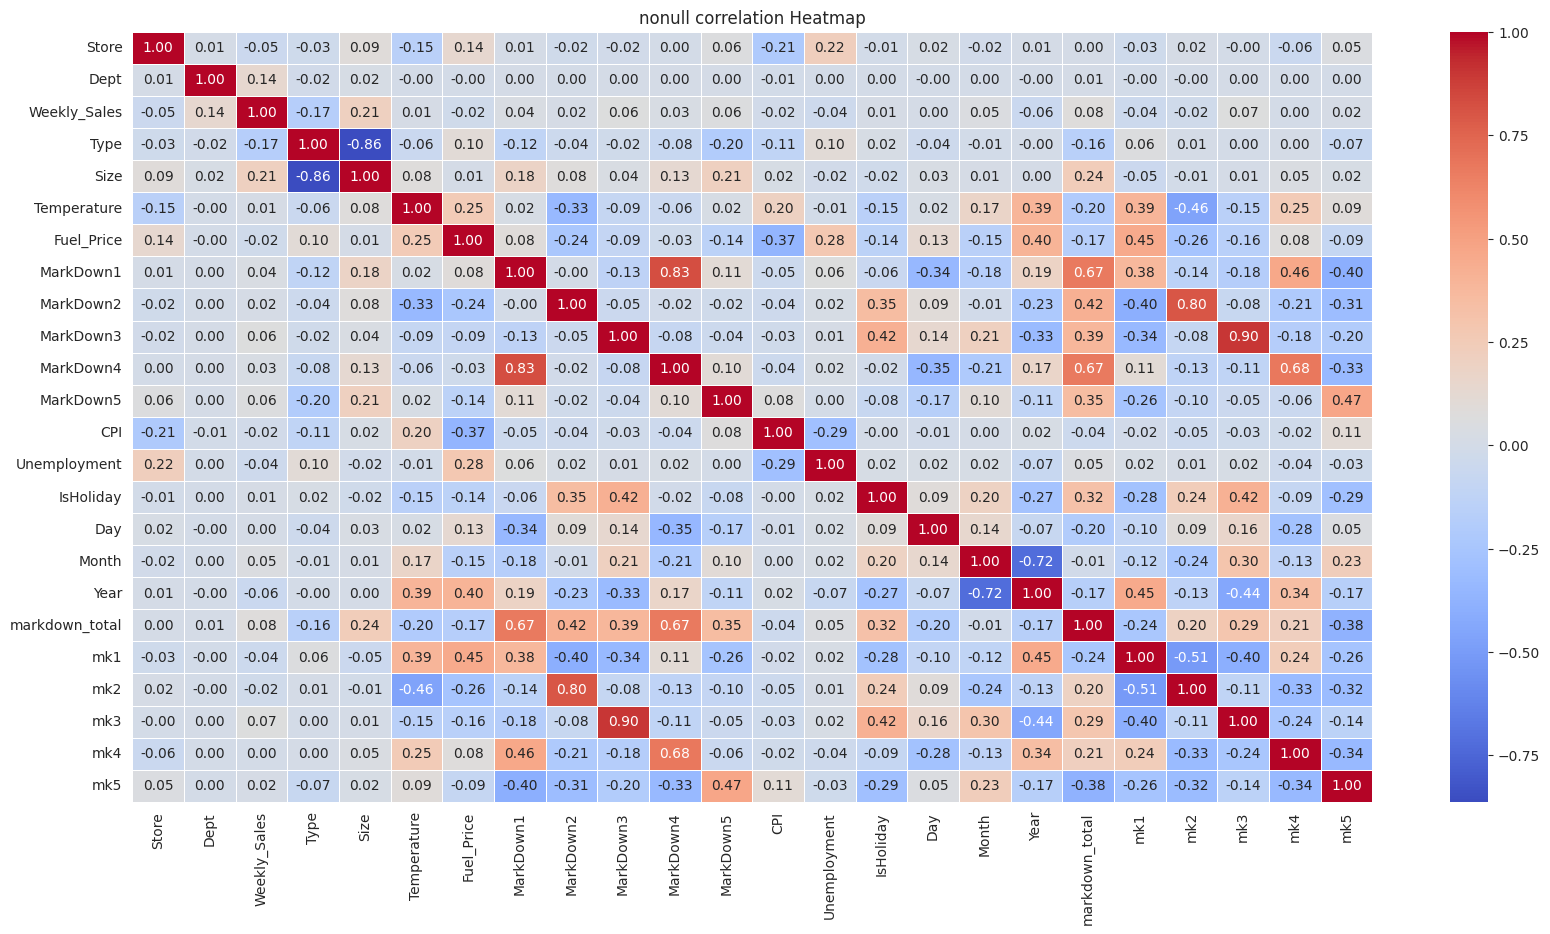

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df_nonull.corr(), annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("nonull correlation Heatmap")
plt.show()

In [ ]:
# from df_nonull correlation, weekly sales have good correlation with department, type and size compare to other columns

In [48]:
df_date = df.copy()

In [49]:
df_date['MarkDown1']=df_date['MarkDown1'].transform(lambda x: x.ffill().bfill())
df_date['MarkDown2']=df_date['MarkDown2'].transform(lambda x: x.ffill().bfill())
df_date['MarkDown3']=df_date['MarkDown3'].transform(lambda x: x.ffill().bfill())
df_date['MarkDown4']=df_date['MarkDown4'].transform(lambda x: x.ffill().bfill())
df_date['MarkDown5']=df_date['MarkDown5'].transform(lambda x: x.ffill().bfill())

In [ ]:
# filling null values in the markdowns by ffill and bfill from this each department in a store have same markdowns

In [50]:
df_date.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,24924.50,1,151315,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,0,5,2,2010
1,1,2,50605.27,1,151315,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,0,5,2,2010
2,1,3,13740.12,1,151315,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,0,5,2,2010
3,1,4,39954.04,1,151315,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,0,5,2,2010
4,1,5,32229.38,1,151315,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,0,5,2,2010


In [51]:
df_date.isna().sum()

,0
Store,0
Dept,0
Weekly_Sales,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [53]:
df_date.corr()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
Store,1.000000,0.024004,-0.085198,0.226410,-0.182881,-0.050097,0.065290,-0.158228,-0.064166,-0.021275,-0.091441,-0.089828,-0.211088,0.208552,-0.000548,-0.000015,0.001011,0.002997
Dept,0.024004,1.000000,0.148035,0.003708,-0.002966,0.004437,0.003572,-0.002305,0.000627,0.001434,-0.000052,-0.001795,-0.007477,0.007837,0.000916,-0.000678,0.000904,0.003738
Weekly_Sales,-0.085198,0.148035,1.000000,-0.182245,0.243833,-0.002312,-0.000121,0.052343,0.025132,0.038339,0.041446,0.054104,-0.020924,-0.025857,0.012776,-0.006188,0.028413,-0.010113
Type,0.226410,0.003708,-0.182245,1.000000,-0.811593,0.042981,0.029687,-0.212013,-0.069859,-0.024330,-0.117481,-0.169784,-0.065812,0.148720,-0.000798,0.000279,-0.000069,0.004208
Size,-0.182881,-0.002966,0.243833,-0.811593,1.000000,-0.058313,0.003361,0.246072,0.081464,0.032691,0.150830,0.165164,-0.003314,-0.068238,0.000593,-0.000386,-0.001210,-0.004975
Temperature,-0.050097,0.004437,-0.002312,0.042981,-0.058313,1.000000,0.143859,-0.066875,-0.168474,-0.055490,-0.056376,-0.009709,0.182112,0.096730,-0.155949,0.026832,0.235983,0.065814
Fuel_Price,0.065290,0.003572,-0.000121,0.029687,0.003361,0.143859,1.000000,0.121778,0.018834,0.016580,0.127670,0.106575,-0.164210,-0.033853,-0.078281,0.028058,-0.040876,0.779633
MarkDown1,-0.158228,-0.002305,0.052343,-0.212013,0.246072,-0.066875,0.121778,1.000000,0.102808,-0.057627,0.756396,0.267431,-0.006520,-0.039897,-0.013744,-0.139959,-0.093806,0.187052
MarkDown2,-0.064166,0.000627,0.025132,-0.069859,0.081464,-0.168474,0.018834,0.102808,1.000000,-0.008975,0.096093,0.098206,0.015031,-0.039302,0.205030,0.050786,-0.019823,0.120007
MarkDown3,-0.021275,0.001434,0.038339,-0.024330,0.032691,-0.055490,0.016580,-0.057627,-0.008975,1.000000,-0.023504,0.017498,-0.007039,-0.016897,0.266479,0.072128,0.116078,0.002260


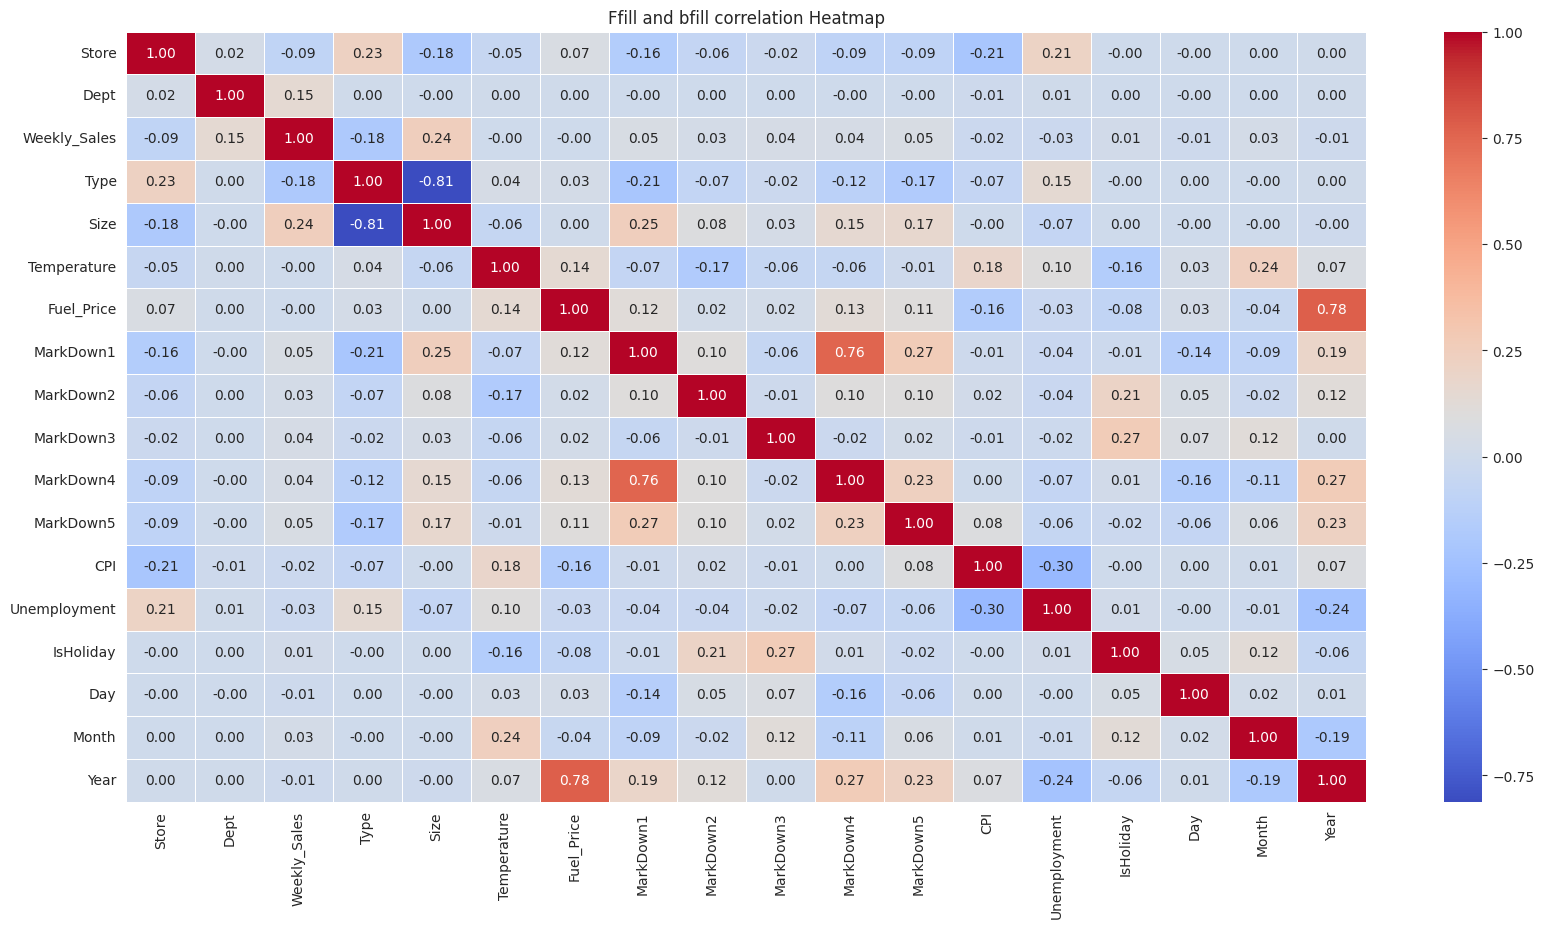

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_date.corr(), annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Ffill and bfill correlation Heatmap")
plt.show()

In [ ]:
# slight improvement in dept, type and size but not in markdowns

In [ ]:
# replace null by mean

In [57]:
df_mean = df.copy()

In [58]:
df_mean.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,24924.50,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
1,1,2,50605.27,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
2,1,3,13740.12,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
3,1,4,39954.04,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010
4,1,5,32229.38,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,2,2010


In [59]:
df_mean['MarkDown1'].fillna(df_mean['MarkDown1'].mean(), inplace=True)
df_mean['MarkDown2'].fillna(df_mean['MarkDown2'].mean(), inplace=True)
df_mean['MarkDown3'].fillna(df_mean['MarkDown3'].mean(), inplace=True)
df_mean['MarkDown4'].fillna(df_mean['MarkDown4'].mean(), inplace=True)
df_mean['MarkDown5'].fillna(df_mean['MarkDown5'].mean(), inplace=True)

In [60]:
df_mean.corr()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
Store,1.000000,0.024004,-0.085198,0.226410,-0.182881,-0.050097,0.065290,-0.071460,-0.017445,-0.017935,-0.005343,-0.015976,-0.211088,0.208552,-0.000548,-0.000015,0.001011,0.002997
Dept,0.024004,1.000000,0.148035,0.003708,-0.002966,0.004437,0.003572,-0.001456,0.000148,0.001017,0.002385,0.000065,-0.007477,0.007837,0.000916,-0.000678,0.000904,0.003738
Weekly_Sales,-0.085198,0.148035,1.000000,-0.182245,0.243833,-0.002312,-0.000121,0.052208,0.013125,0.036017,0.026984,0.055405,-0.020924,-0.025857,0.012776,-0.006188,0.028413,-0.010113
Type,0.226410,0.003708,-0.182245,1.000000,-0.811593,0.042981,0.029687,-0.153416,-0.030183,-0.020915,-0.051046,-0.155627,-0.065812,0.148720,-0.000798,0.000279,-0.000069,0.004208
Size,-0.182881,-0.002966,0.243833,-0.811593,1.000000,-0.058313,0.003361,0.206346,0.051883,0.027068,0.084923,0.182944,-0.003314,-0.068238,0.000593,-0.000386,-0.001210,-0.004975
Temperature,-0.050097,0.004437,-0.002312,0.042981,-0.058313,1.000000,0.143859,-0.023189,-0.162835,-0.052169,-0.034571,-0.010056,0.182112,0.096730,-0.155949,0.026832,0.235983,0.065814
Fuel_Price,0.065290,0.003572,-0.000121,0.029687,0.003361,0.143859,1.000000,0.023104,-0.070184,-0.036553,-0.015774,-0.048429,-0.164210,-0.033853,-0.078281,0.028058,-0.040876,0.779633
MarkDown1,-0.071460,-0.001456,0.052208,-0.153416,0.206346,-0.023189,0.023104,1.000000,0.022747,-0.105646,0.785341,0.160079,-0.034201,0.027864,-0.022472,-0.172965,-0.111246,0.038604
MarkDown2,-0.017445,0.000148,0.013125,-0.030183,0.051883,-0.162835,-0.070184,0.022747,1.000000,-0.047662,-0.006580,-0.007010,-0.020744,0.009924,0.198468,0.033085,-0.003039,-0.055147
MarkDown3,-0.017935,0.001017,0.036017,-0.020915,0.027068,-0.052169,-0.036553,-0.105646,-0.047662,1.000000,-0.069613,-0.024990,-0.013788,0.006771,0.264071,0.076160,0.113981,-0.085515


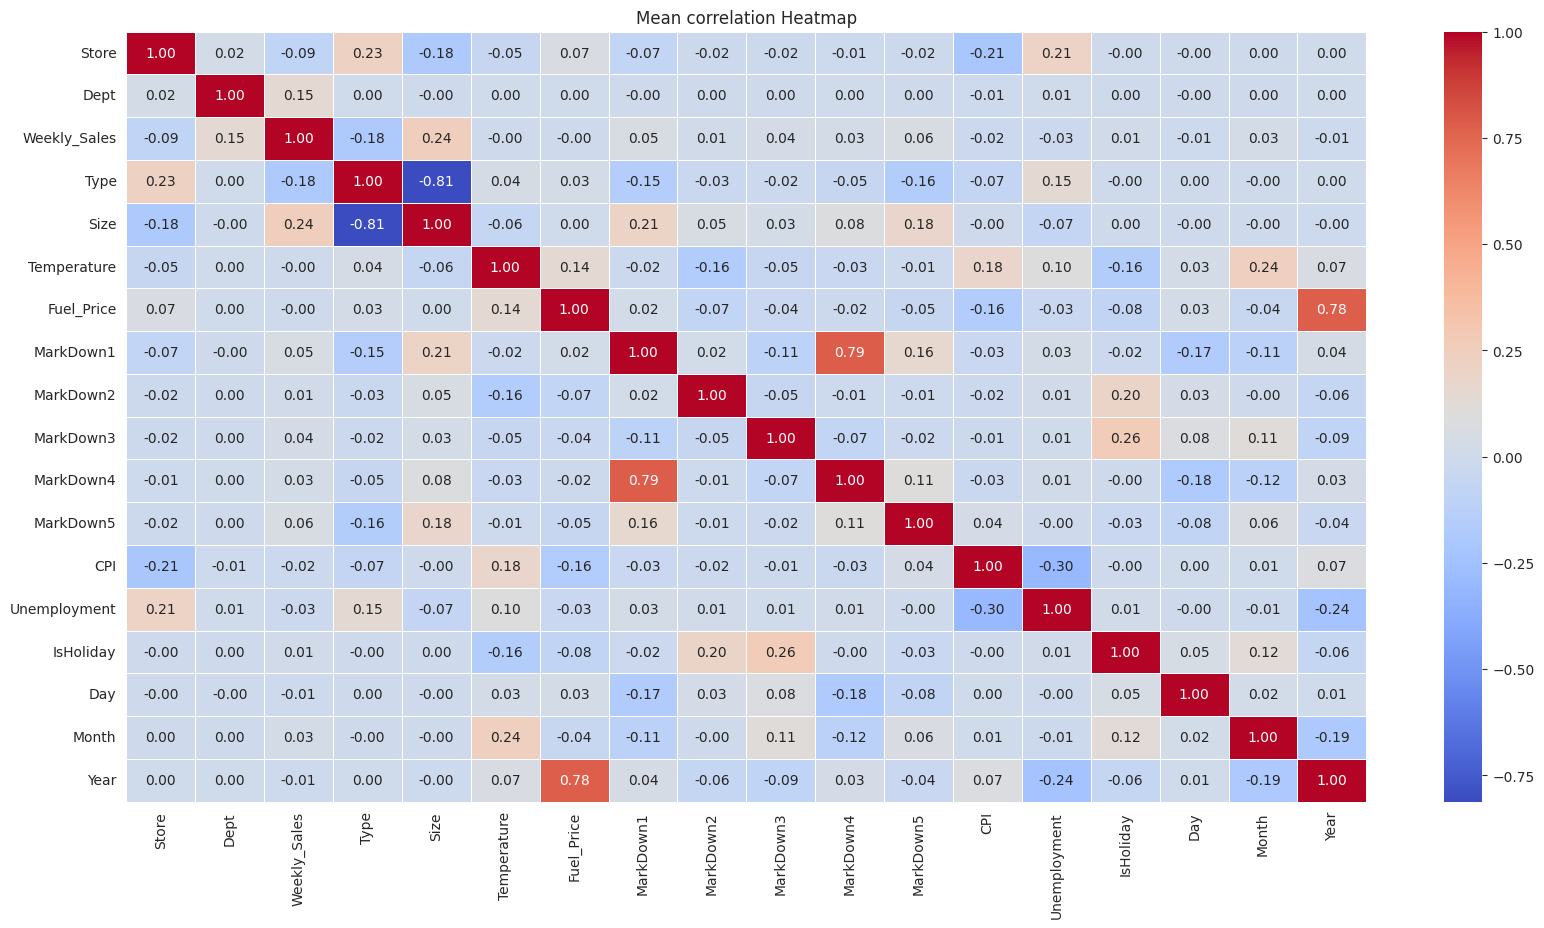

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(df_mean.corr(), annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Mean correlation Heatmap")
plt.show()

In [62]:
# no improvement in markdowns

In [ ]:
# replace null by median

In [63]:
df_median = df.copy()

In [64]:
df_median['MarkDown1'].fillna(df_median['MarkDown1'].median(), inplace=True)
df_median['MarkDown2'].fillna(df_median['MarkDown2'].median(), inplace=True)
df_median['MarkDown3'].fillna(df_median['MarkDown3'].median(), inplace=True)
df_median['MarkDown4'].fillna(df_median['MarkDown4'].median(), inplace=True)
df_median['MarkDown5'].fillna(df_median['MarkDown5'].median(), inplace=True)

In [65]:
df_median.corr()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
Store,1.000000,0.024004,-0.085198,0.226410,-0.182881,-0.050097,0.065290,-0.070700,-0.032997,-0.020293,-0.027762,-0.015393,-0.211088,0.208552,-0.000548,-0.000015,0.001011,0.002997
Dept,0.024004,1.000000,0.148035,0.003708,-0.002966,0.004437,0.003572,-0.000587,0.000564,0.001468,0.002169,0.000896,-0.007477,0.007837,0.000916,-0.000678,0.000904,0.003738
Weekly_Sales,-0.085198,0.148035,1.000000,-0.182245,0.243833,-0.002312,-0.000121,0.052738,0.020346,0.038523,0.033820,0.055701,-0.020924,-0.025857,0.012776,-0.006188,0.028413,-0.010113
Type,0.226410,0.003708,-0.182245,1.000000,-0.811593,0.042981,0.029687,-0.151113,-0.054049,-0.023963,-0.075250,-0.152760,-0.065812,0.148720,-0.000798,0.000279,-0.000069,0.004208
Size,-0.182881,-0.002966,0.243833,-0.811593,1.000000,-0.058313,0.003361,0.203202,0.077080,0.033534,0.112056,0.179588,-0.003314,-0.068238,0.000593,-0.000386,-0.001210,-0.004975
Temperature,-0.050097,0.004437,-0.002312,0.042981,-0.058313,1.000000,0.143859,-0.025144,-0.179142,-0.055968,-0.044688,-0.011890,0.182112,0.096730,-0.155949,0.026832,0.235983,0.065814
Fuel_Price,0.065290,0.003572,-0.000121,0.029687,0.003361,0.143859,1.000000,0.110255,0.023717,0.017681,0.092716,0.033922,-0.164210,-0.033853,-0.078281,0.028058,-0.040876,0.779633
MarkDown1,-0.070700,-0.000587,0.052738,-0.151113,0.203202,-0.025144,0.110255,1.000000,0.088357,-0.075525,0.816148,0.186165,-0.021389,-0.012874,-0.017418,-0.165252,-0.108817,0.185703
MarkDown2,-0.032997,0.000564,0.020346,-0.054049,0.077080,-0.179142,0.023717,0.088357,1.000000,-0.008702,0.069051,0.047080,-0.004514,-0.038676,0.207562,0.051041,-0.018499,0.121806
MarkDown3,-0.020293,0.001468,0.038523,-0.023963,0.033534,-0.055968,0.017681,-0.075525,-0.008702,1.000000,-0.035481,-0.001381,-0.005974,-0.017658,0.266464,0.072233,0.116010,0.005224


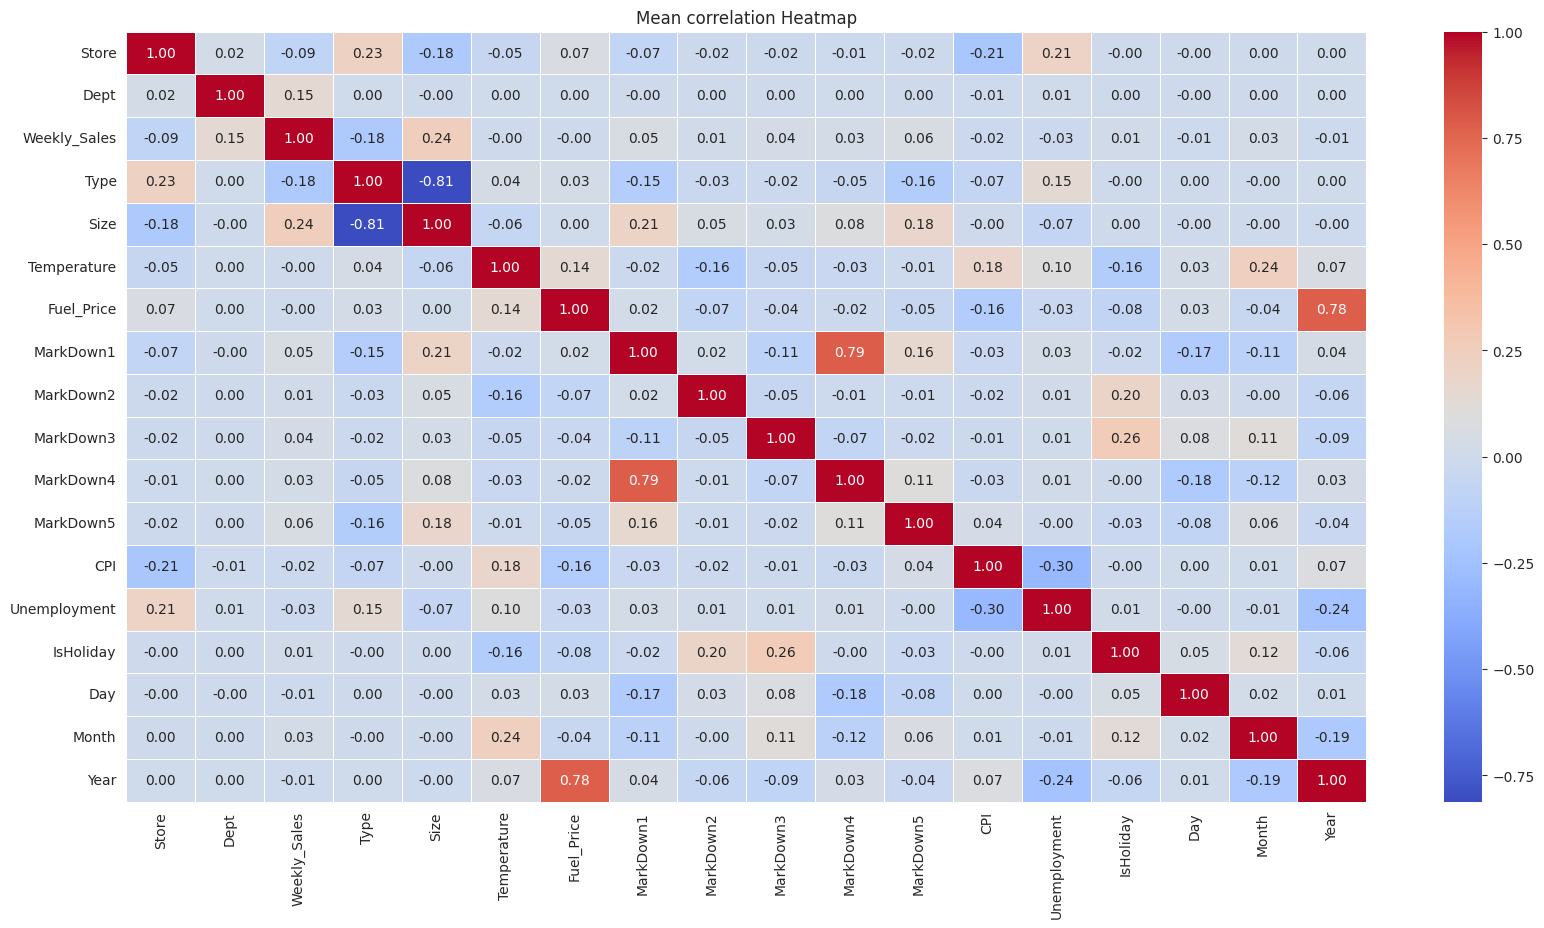

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(df_mean.corr(), annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("Mean correlation Heatmap")
plt.show()

In [67]:
# no changes in markdowns

In [68]:
# predicting null values by machine learning

In [69]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month',
       'Year'],
      dtype='object')

In [70]:
df.columns[df.isna().any()]

Index(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], dtype='object')

In [71]:
# independent and dependent variables
x=['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month',
       'Year']
y=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

In [ ]:
# train= df[df['MarkDown1'].notnull()]
# test = df[df['MarkDown2'].isna()]

In [ ]:
# train and test split
# x_train=train[x]
# y_train=train['MarkDown1']
# x_test=test[x]

In [ ]:
# model = RandomForestRegressor().fit(x_train, y_train)
# y_predict = model.predict(x_test)

In [72]:
for i in y:
  train= df[df[i].notnull()]
  test = df[df[i].isna()]
  x_train=train[x]
  y_train=train[i]
  x_test=test[x]

  model = RandomForestRegressor().fit(x_train, y_train)
  y_predict = model.predict(x_test)
  df.loc[df[i].isnull(), i] = y_predict



In [75]:
df.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,24924.50,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
1,1,2,50605.27,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
2,1,3,13740.12,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
3,1,4,39954.04,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
4,1,5,32229.38,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010


In [76]:
df.isna().sum()

,0
Store,0
Dept,0
Weekly_Sales,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


Text(0.5, 1.0, 'after ML correlation Heatmap')

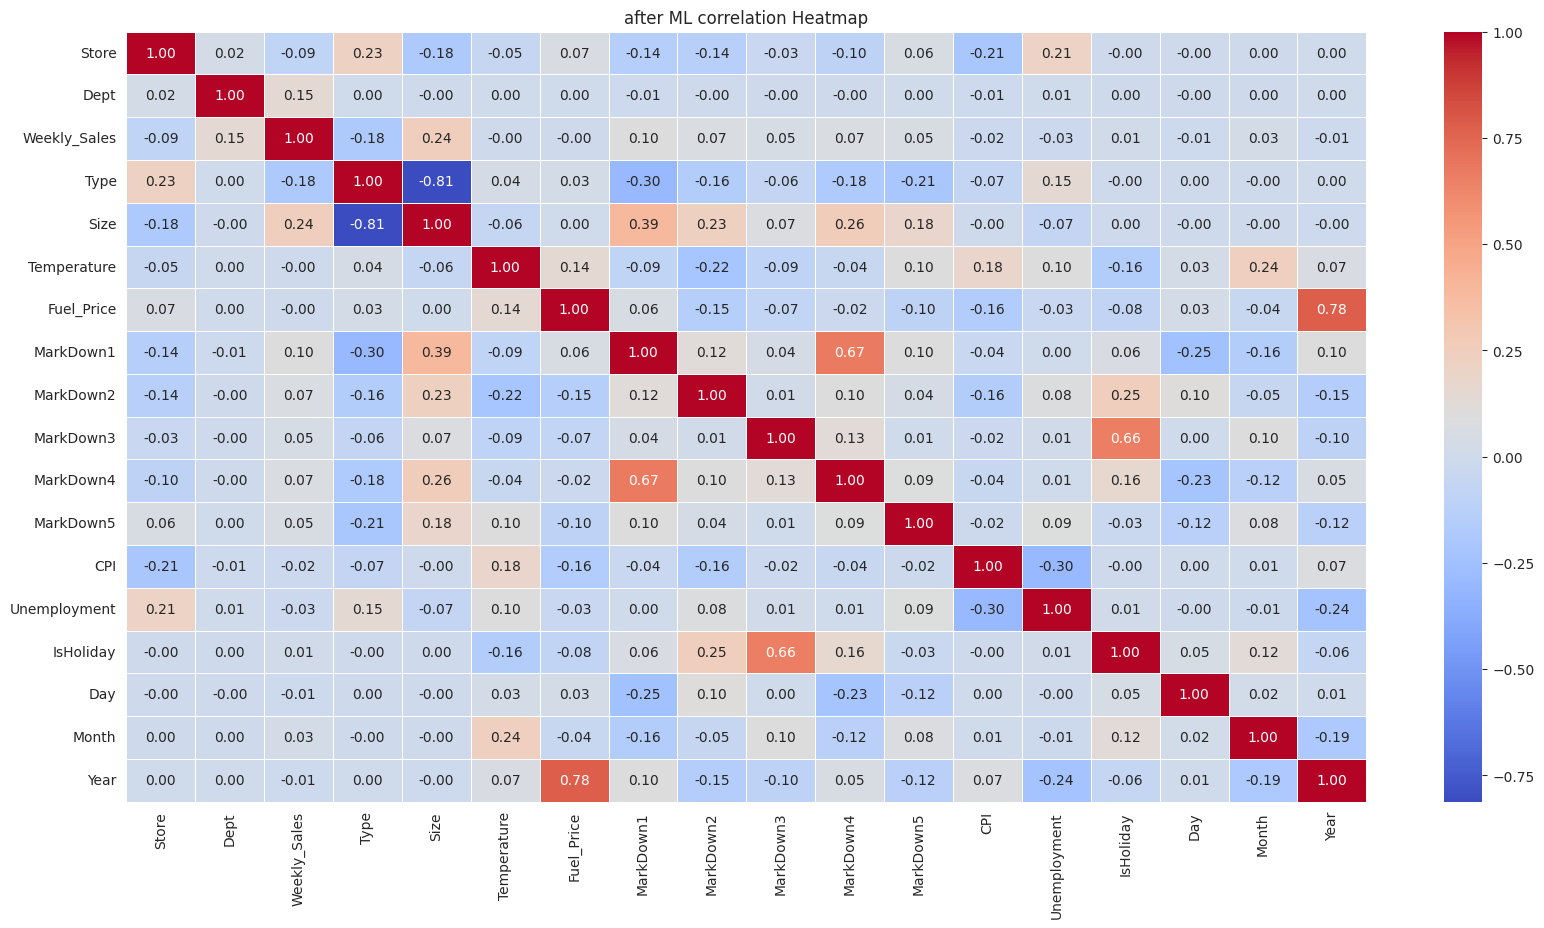

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,linewidths=0.5,fmt=".2f", cmap="coolwarm")
plt.title("after ML correlation Heatmap")

In [ ]:
# comparing to above methods correlation in markdowns with weekly sales after ML is good. Comparing with other columns Department, Type and Size have good correlation with weekly sales.

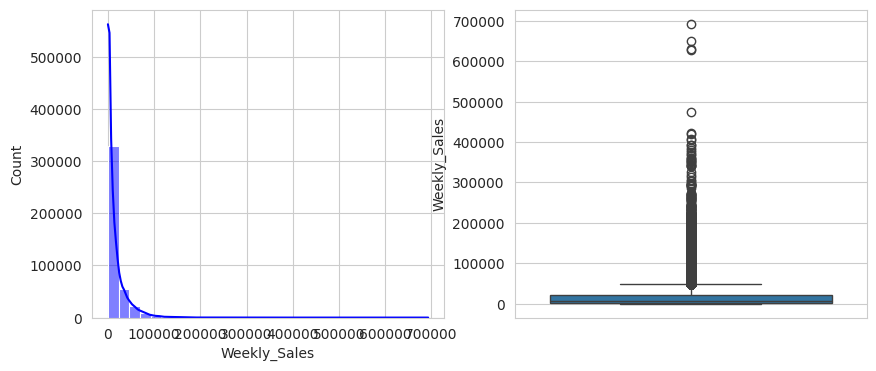

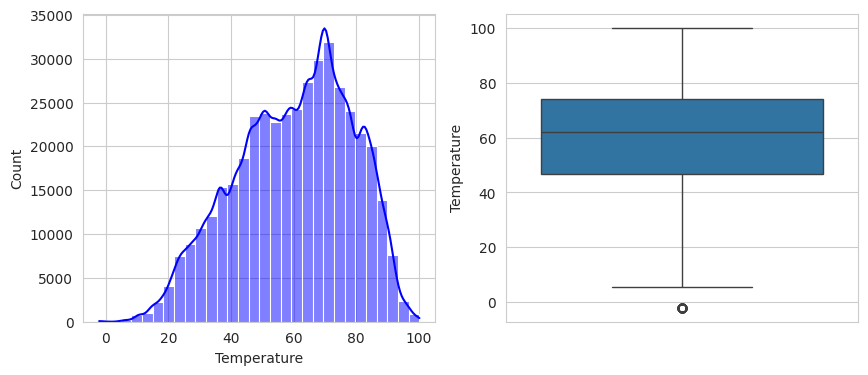

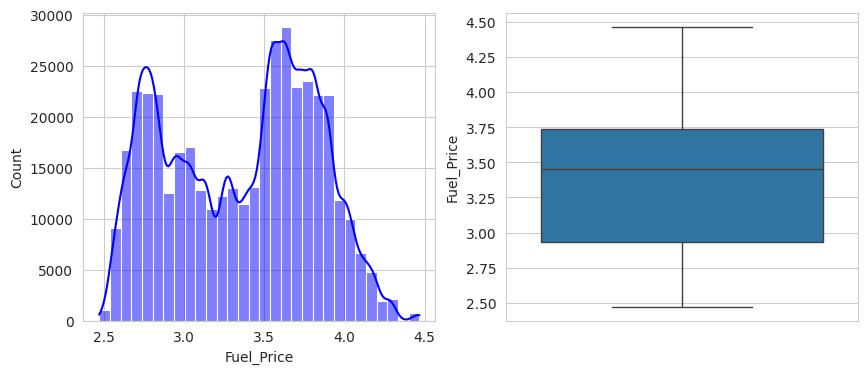

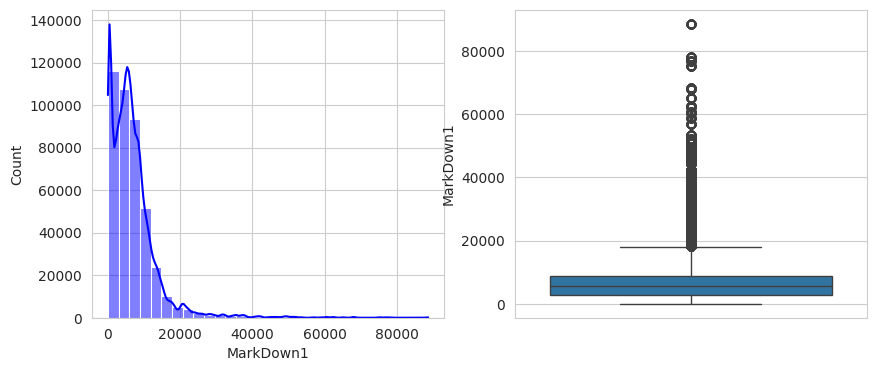

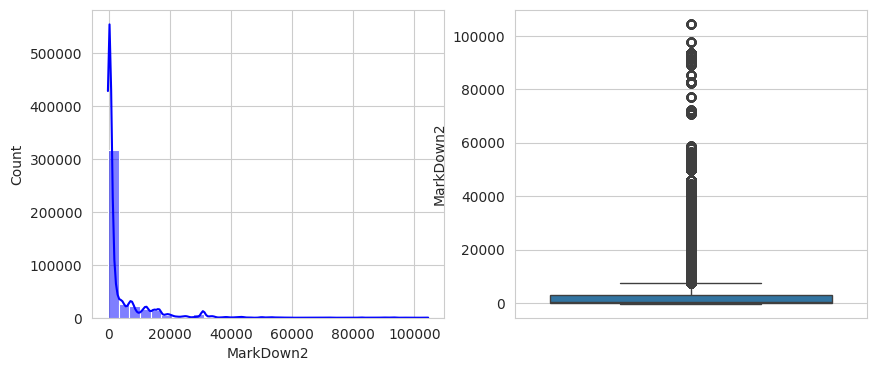

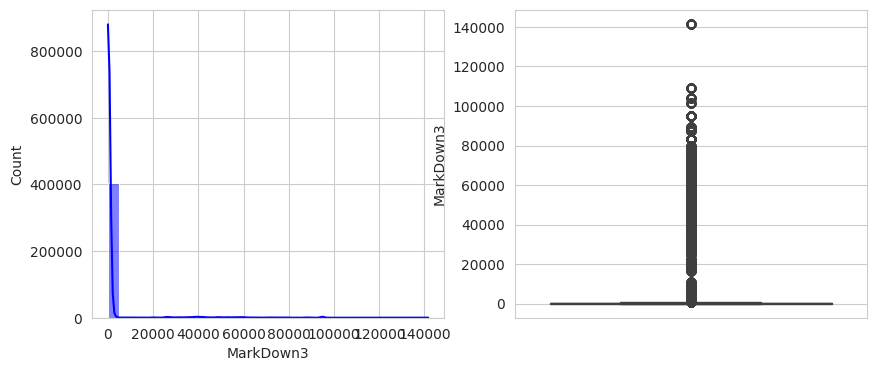

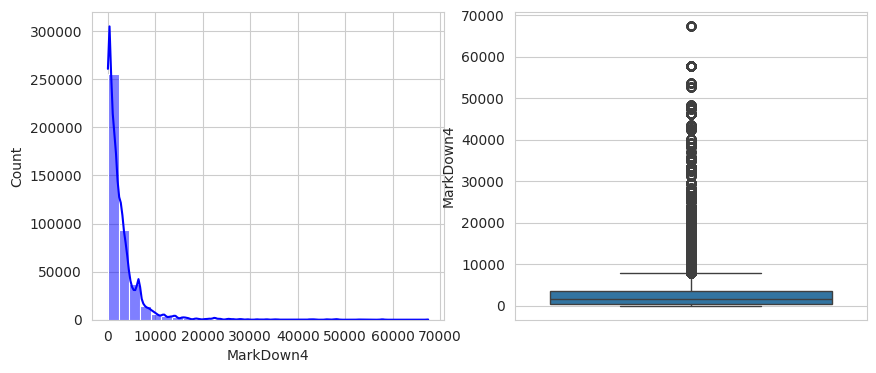

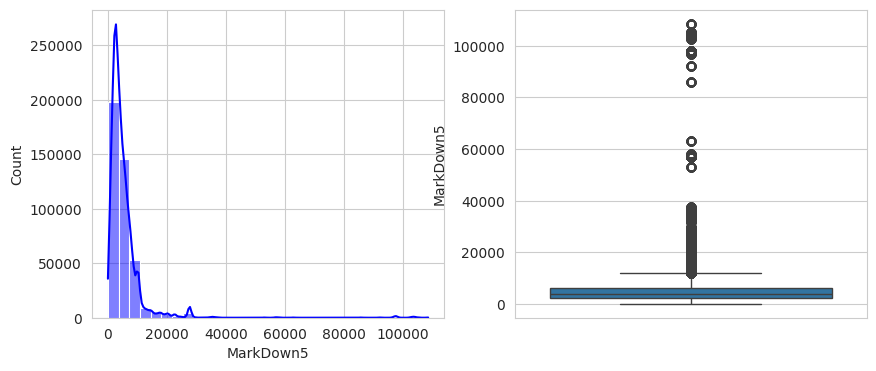

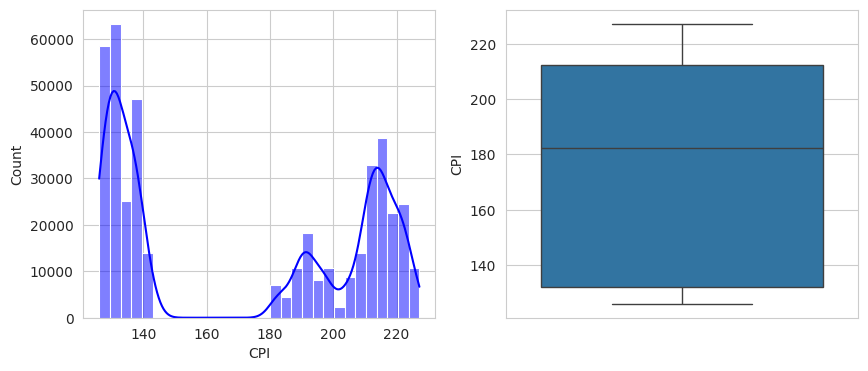

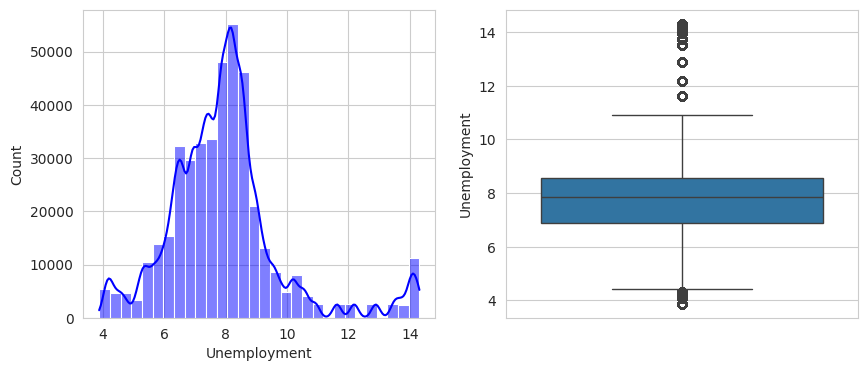

In [79]:
for i in con:
  chart(df, i)

In [80]:
for i in con:
  print(f'{i} = {skew(df[i])}')

Weekly_Sales = 3.2620955965399565
Temperature = -0.32140300837175534
Fuel_Price = -0.1049011223750906
MarkDown1 = 3.553158103056939
MarkDown2 = 4.456204691978136
MarkDown3 = 6.177715106362836
MarkDown4 = 5.493183629810436
MarkDown5 = 8.69734660612381
CPI = 0.08521898151118588
Unemployment = 1.1837383565857527


In [81]:
df_no_skew= df.copy()

In [82]:
# sqrt have the good skew

df['Weekly_Sales_log']=stats.boxcox(df['Weekly_Sales'], lmbda=0)
df['Weekly_Sales_sqrt']=stats.boxcox(df['Weekly_Sales'], lmbda=0.5)
df['Weekly_Sales_inve_sqrt']=stats.boxcox(df['Weekly_Sales'], lmbda=-0.5)
df[["Weekly_Sales", "Weekly_Sales_log", "Weekly_Sales_sqrt", "Weekly_Sales_inve_sqrt"]].agg(["skew"]).transpose()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,skew
Weekly_Sales,3.262107
Weekly_Sales_log,NaN
Weekly_Sales_sqrt,1.059365
Weekly_Sales_inve_sqrt,NaN


In [83]:
df.drop(["Weekly_Sales", "Weekly_Sales_log", "Weekly_Sales_inve_sqrt"], axis=1, inplace=True)

In [84]:
#sqrt

df['MarkDown1_log']=stats.boxcox(df['MarkDown1'], lmbda=0)
df['MarkDown1_sqrt']=stats.boxcox(df['MarkDown1'], lmbda=0.5)
df['MarkDown1_inve_sqrt']=stats.boxcox(df['MarkDown1'], lmbda=-0.5)
df[["MarkDown1", "MarkDown1_log", "MarkDown1_sqrt", "MarkDown1_inve_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown1,3.553171
MarkDown1_log,-1.650055
MarkDown1_sqrt,0.643978
MarkDown1_inve_sqrt,-17.439209


In [85]:
df.drop(["MarkDown1", "MarkDown1_log", "MarkDown1_inve_sqrt"], axis=1, inplace=True)

In [86]:
#sqrt
df['MarkDown2_log']=stats.boxcox(df['MarkDown2'], lmbda=0)
df['MarkDown2_sqrt']=stats.boxcox(df['MarkDown2'], lmbda=0.5)
df['MarkDown2_inve_sqrt']=stats.boxcox(df['MarkDown2'], lmbda=-0.5)
df[["MarkDown2", "MarkDown2_log", "MarkDown2_sqrt", "MarkDown2_inve_sqrt"]].agg(["skew"]).transpose()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,skew
MarkDown2,4.456221
MarkDown2_log,NaN
MarkDown2_sqrt,1.907977
MarkDown2_inve_sqrt,NaN


In [87]:
df.drop(["MarkDown2", "MarkDown2_log", "MarkDown2_inve_sqrt"], axis=1, inplace=True)

In [88]:
#sqrt
df['MarkDown3_log']=stats.boxcox(df['MarkDown3'], lmbda=0)
df['MarkDown3_sqrt']=stats.boxcox(df['MarkDown3'], lmbda=0.5)
df['MarkDown3_inve_sqrt']=stats.boxcox(df['MarkDown3'], lmbda=-0.5)
df[["MarkDown3", "MarkDown3_log", "MarkDown3_sqrt", "MarkDown3_inve_sqrt"]].agg(["skew"]).transpose()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


,skew
MarkDown3,6.177737
MarkDown3_log,NaN
MarkDown3_sqrt,4.865483
MarkDown3_inve_sqrt,NaN


In [89]:
df.drop(["MarkDown3", "MarkDown3_log", "MarkDown3_inve_sqrt"], axis=1, inplace=True)

In [90]:
#log
df['MarkDown4_log']=stats.boxcox(df['MarkDown4'], lmbda=0)
df['MarkDown4_sqrt']=stats.boxcox(df['MarkDown4'], lmbda=0.5)
df['MarkDown4_inve_sqrt']=stats.boxcox(df['MarkDown4'], lmbda=-0.5)
df[["MarkDown4", "MarkDown4_log", "MarkDown4_sqrt", "MarkDown4_inve_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown4,5.493203
MarkDown4_log,-1.130955
MarkDown4_sqrt,1.430598
MarkDown4_inve_sqrt,-5.757626


In [91]:
df.drop(["MarkDown4", "MarkDown4_sqrt", "MarkDown4_inve_sqrt"], axis=1, inplace=True)

In [92]:
#log
df['MarkDown5_log']=stats.boxcox(df['MarkDown5'], lmbda=0)
df['MarkDown5_sqrt']=stats.boxcox(df['MarkDown5'], lmbda=0.5)
df['MarkDown5_inve_sqrt']=stats.boxcox(df['MarkDown5'], lmbda=-0.5)
df[["MarkDown5", "MarkDown5_log", "MarkDown5_sqrt", "MarkDown5_inve_sqrt"]].agg(["skew"]).transpose()

,skew
MarkDown5,8.697378
MarkDown5_log,0.029592
MarkDown5_sqrt,2.907735
MarkDown5_inve_sqrt,-2.139026


In [93]:
df.drop(["MarkDown5", "MarkDown5_sqrt", "MarkDown5_inve_sqrt"], axis=1, inplace=True)

In [94]:
continuous=['Weekly_Sales_sqrt',
 'Temperature',
 'Fuel_Price',
 'MarkDown1_sqrt', 'MarkDown2_sqrt',
  'MarkDown3_sqrt', 'MarkDown4_log', 'MarkDown5_log',
 'CPI',
 'Unemployment']

In [95]:
df.columns

Index(['Store', 'Dept', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Day', 'Month', 'Year',
       'Weekly_Sales_sqrt', 'MarkDown1_sqrt', 'MarkDown2_sqrt',
       'MarkDown3_sqrt', 'MarkDown4_log', 'MarkDown5_log'],
      dtype='object')

In [96]:
df.isna().sum()

,0
Store,0
Dept,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
IsHoliday,0
Day,0


In [97]:
df['MarkDown2_sqrt'].fillna(df['MarkDown2_sqrt'].mean(), inplace=True)
df['MarkDown3_sqrt'].fillna(df['MarkDown3_sqrt'].mean(), inplace=True)

In [98]:
# function to remove outliers using the IQR method
def outliers(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df=df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df

In [99]:
df.shape

(421570, 18)

In [100]:
for i in continuous:
  outliers(df,i)

In [101]:
df.shape

(421570, 18)

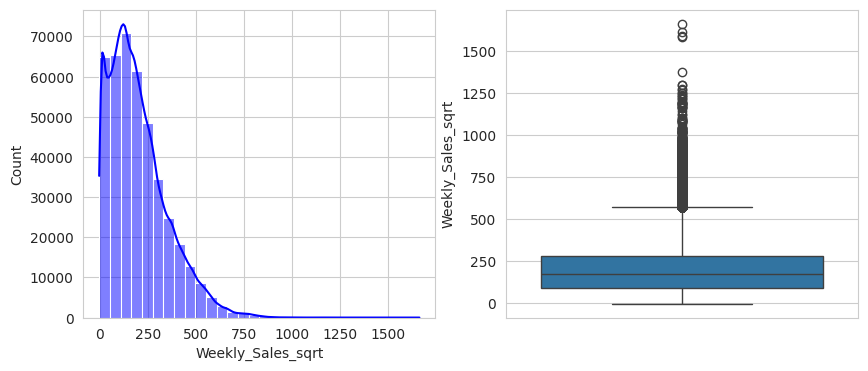

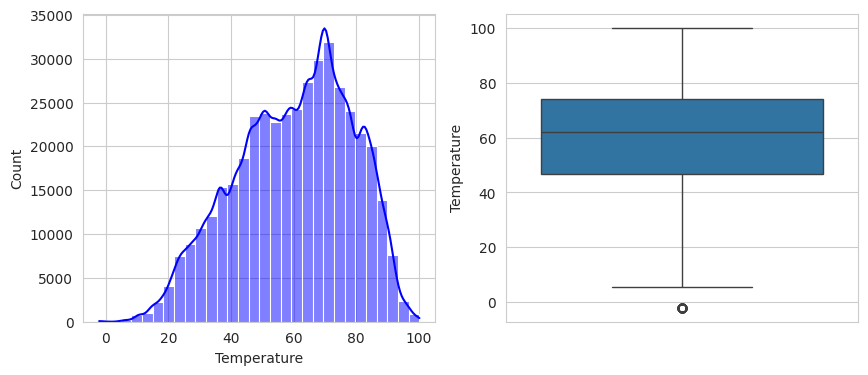

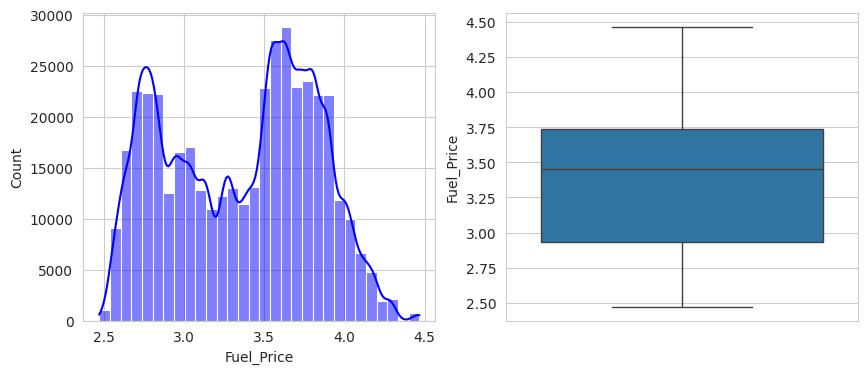

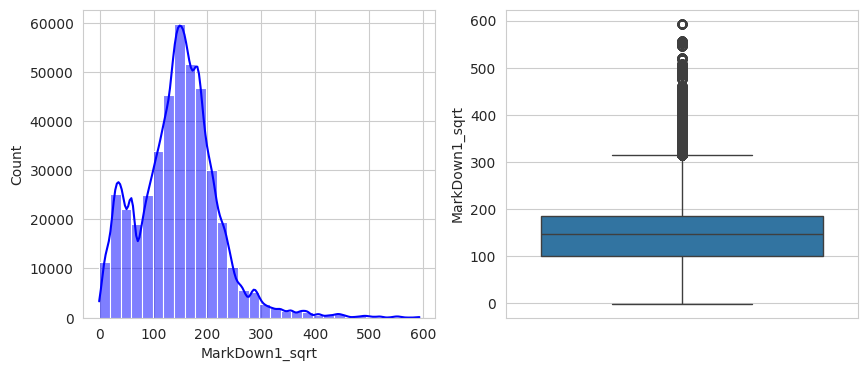

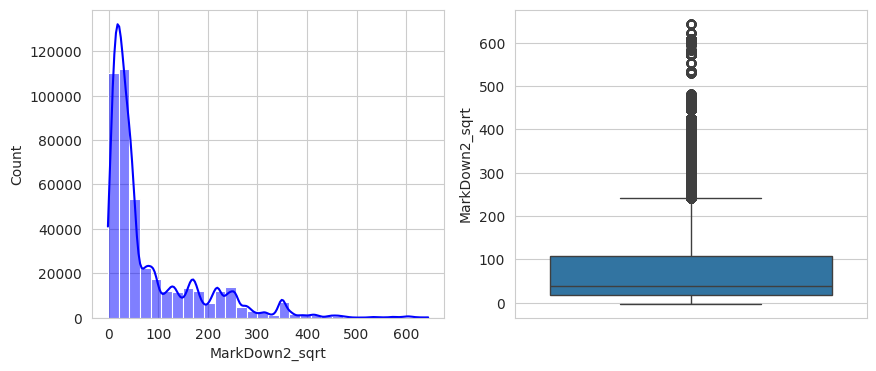

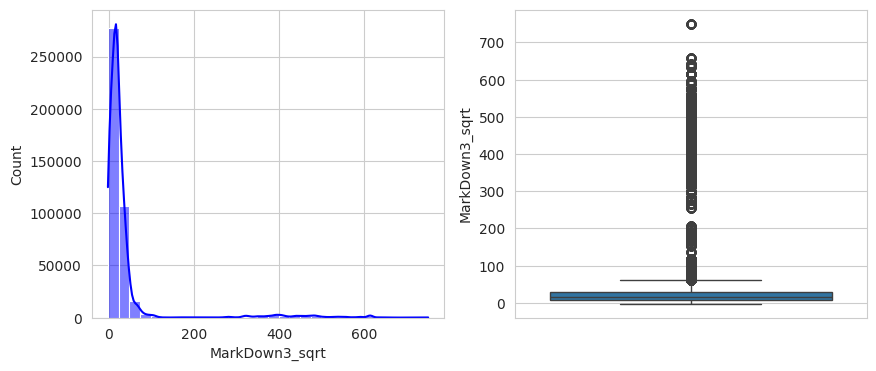

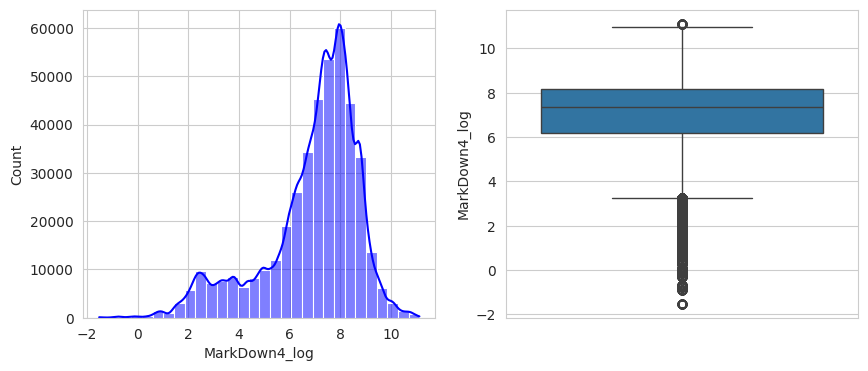

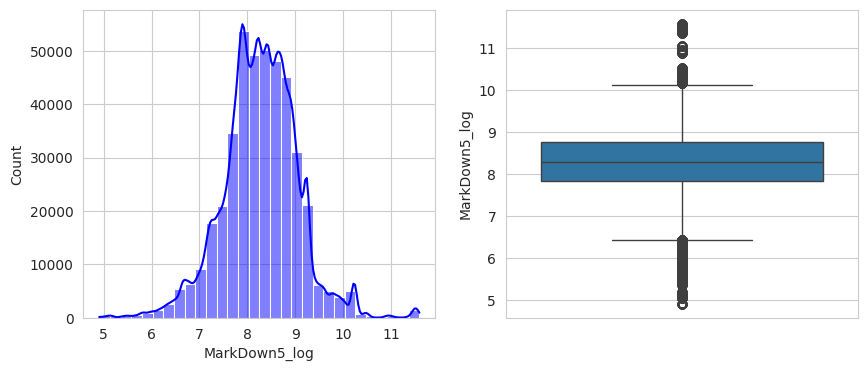

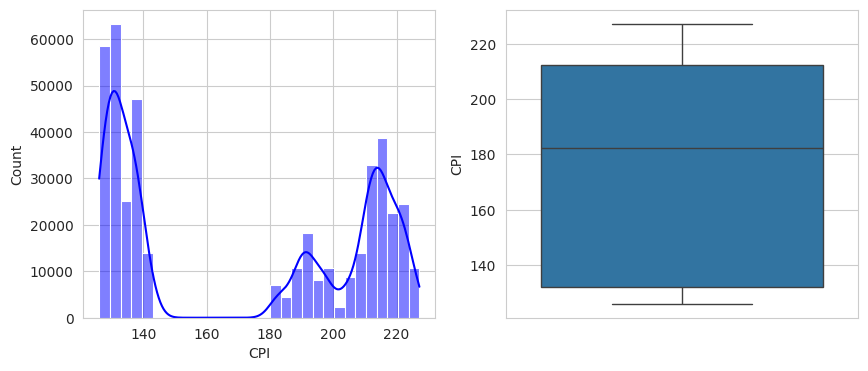

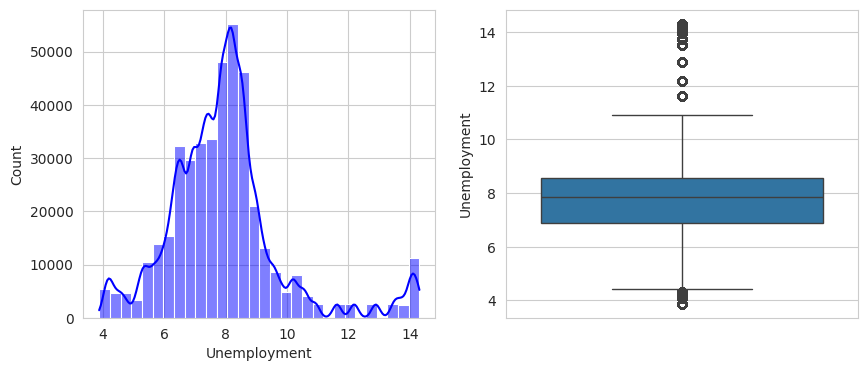

In [102]:
# after skewness
for i in continuous:
  chart(df, i)

In [103]:
df

,Store,Dept,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Day,Month,Year,Weekly_Sales_sqrt,MarkDown1_sqrt,MarkDown2_sqrt,MarkDown3_sqrt,MarkDown4_log,MarkDown5_log
0,1,1,1,151315,42.31,2.572,211.096358,8.106,0,5,2,2010,313.749901,136.872534,316.518010,37.835813,7.147390,8.221206
1,1,2,1,151315,42.31,2.572,211.096358,8.106,0,5,2,2010,447.912303,136.872534,316.518010,37.835813,7.147390,8.221206
2,1,3,1,151315,42.31,2.572,211.096358,8.106,0,5,2,2010,232.436516,136.872534,316.518010,37.835813,7.147390,8.221206
3,1,4,1,151315,42.31,2.572,211.096358,8.106,0,5,2,2010,397.770134,136.872534,316.518010,37.835813,7.147390,8.221206
4,1,5,1,151315,42.31,2.572,211.096358,8.106,0,5,2,2010,357.050860,136.872534,316.518010,37.835813,7.147390,8.221206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2,118221,58.85,3.882,192.308899,8.667,0,26,10,2012,97.755702,124.789747,13.242047,18.000000,5.356303,6.754989
421566,45,94,2,118221,58.85,3.882,192.308899,8.667,0,26,10,2012,142.267945,124.789747,13.242047,18.000000,5.356303,6.754989
421567,45,95,2,118221,58.85,3.882,192.308899,8.667,0,26,10,2012,471.360201,124.789747,13.242047,18.000000,5.356303,6.754989
421568,45,97,2,118221,58.85,3.882,192.308899,8.667,0,26,10,2012,163.136065,124.789747,13.242047,18.000000,5.356303,6.754989


In [ ]:
df.to_csv('final_project_skewed.csv', index=False)

In [ ]:
# no skew

In [104]:
df_no_skew

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Day,Month,Year
0,1,1,24924.50,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
1,1,2,50605.27,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
2,1,3,13740.12,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
3,1,4,39954.04,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
4,1,5,32229.38,1,151315,42.31,2.572,4821.3952,25363.4307,396.723,1270.7853,3718.9851,211.096358,8.106,0,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,2,118221,58.85,3.882,4018.9100,58.0800,100.000,211.9400,858.3300,192.308899,8.667,0,26,10,2012
421566,45,94,5203.31,2,118221,58.85,3.882,4018.9100,58.0800,100.000,211.9400,858.3300,192.308899,8.667,0,26,10,2012
421567,45,95,56017.47,2,118221,58.85,3.882,4018.9100,58.0800,100.000,211.9400,858.3300,192.308899,8.667,0,26,10,2012
421568,45,97,6817.48,2,118221,58.85,3.882,4018.9100,58.0800,100.000,211.9400,858.3300,192.308899,8.667,0,26,10,2012


In [105]:
df_no_skew.shape

(421570, 18)

In [106]:
df_no_skew.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month',
       'Year'],
      dtype='object')

In [107]:
for i in con:
  outliers(df_no_skew, i)

In [108]:
df_no_skew.shape

(421570, 18)

In [ ]:
df_no_skew.to_csv('final_project_no_skew.csv', index=False)